# Autoencoder: AE

In this notebook we explore the using of AEs for anomaly detection. For this purpose, we will use the following procedure:

1. We use the train set for the training process. We use a non-contaminated version of the public test set for validation (to decide early stopping and avoid the overfitting over the training set).
2. The performance of the model was measured over the private test set.


TODO: 
1. Check if the performance improves when using QuantileTransform instead of MinMaxScaler. -> QuantileTransform is fundamental.
2. Check if the performance improves when using only curves with more than 20 detections in both bands. -> Results improves.
3. Check if the performance improves when more importance to the most important features of the Supervised RF-Detector are given.

In [1]:
import torch 

import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

from barbar import Bar

from preprocess import get_mnist
from ae.train import TrainerAE
from ae.test import eval

In [2]:
class Args:
    batch_size = 200
    num_epochs = 350
    lr = 1e-4
    patience = 100
    lr_milestones = [250]
    latent_dim = 32
    anormal_class = 5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training

dataloader_train, dataloader_val, dataloader_test = get_mnist(args)

## Training

In [3]:
ae = TrainerAE(args, dataloader_train, dataloader_val, device)
ae.train()

43663/43663: [===============================>] - ETA 0.4ss
Training Autoencoder... Epoch: 0, Loss: 0.155
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 0, Loss: 0.0872
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 1, Loss: 0.054
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 1, Loss: 0.0317
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 2, Loss: 0.021
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 2, Loss: 0.015
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 3, Loss: 0.011
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 3, Loss: 0.00892
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 4, Lo

43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 36, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 36, Loss: 0.00118
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 37, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 37, Loss: 0.00116
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 38, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 38, Loss: 0.00116
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 39, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 39, Loss: 0.00115
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 40, Loss: 0.001
10916/1

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 72, Loss: 0.00098
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 73, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 73, Loss: 0.000982
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 74, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 74, Loss: 0.000974
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 75, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 75, Loss: 0.000972
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 76, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 76, Los

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 109, Loss: 0.000899
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 110, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 110, Loss: 0.000898
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 111, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 111, Loss: 0.000908
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 112, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 112, Loss: 0.000913
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 113, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 113, Loss: 0.000888
Weights saved.
43663/43

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 146, Loss: 0.000874
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 147, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 147, Loss: 0.000847
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 148, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 148, Loss: 0.000873
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 149, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 149, Loss: 0.000852
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 150, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 150, Loss: 0.000857
43663/43663: [=========

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 183, Loss: 0.000847
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 184, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 184, Loss: 0.000817
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 185, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 185, Loss: 0.000826
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 186, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 186, Loss: 0.000814
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 187, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 187, Loss: 0.000815
43663/43663: [=========

43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 221, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 221, Loss: 0.000817
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 222, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 222, Loss: 0.000791
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 223, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 223, Loss: 0.000786
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 224, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 224, Loss: 0.000791
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 225, Loss: 0.001
10916/109

43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 258, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 258, Loss: 0.000772
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 259, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 259, Loss: 0.000766
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 260, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 260, Loss: 0.000768
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 261, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 261, Loss: 0.000766
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 262, Loss: 0.001
10916/109

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 295, Loss: 0.000763
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 296, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 296, Loss: 0.000764
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 297, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 297, Loss: 0.000764
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 298, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 298, Loss: 0.000765
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 299, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 299, Loss: 0.000762
Weights saved.
43663/43

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 332, Loss: 0.000759
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 333, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 333, Loss: 0.000761
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 334, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 334, Loss: 0.00076
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 335, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 335, Loss: 0.00076
43663/43663: [===============================>] - ETA 0.1ss
Training Autoencoder... Epoch: 336, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 336, Loss: 0.00076
43663/43663

In [4]:
ae.load_weights()

## Learning curve

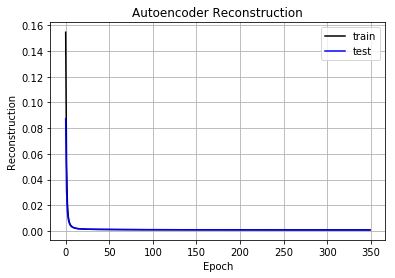

In [5]:
def plot_loss(values, values_t, metric):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('Autoencoder {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)

plot_loss(np.array(ae.reconst), np.array(ae.reconst_t), 'Reconstruction')

## Evaluation

In [6]:
labels1, labels2, scores, latent = eval(ae.model, dataloader_test, device)

Testing...
ROC AUC score: 0.785


In [7]:
x_embedded = TSNE(n_components=2).fit_transform(latent)

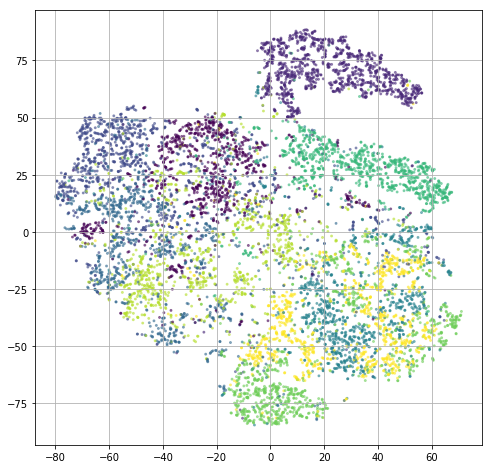

In [16]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 4)
plt.scatter(x_embedded[:, 0][labels2==0], x_embedded[:, 1][labels2==0], c=labels1[labels2==0],
            s=15, alpha=0.5, marker='.')
#plt.scatter(x_embedded[:, 0][labels2!=0], x_embedded[:, 1][labels2!=0], 
#            c=labels2[labels2!=0].reshape(-1,),
#            s=150, alpha=0.1, cmap=cmap, marker='*')

plt.grid(True)

In [11]:
scores_in = scores[labels2==0]
scores_out = scores[labels2==1]

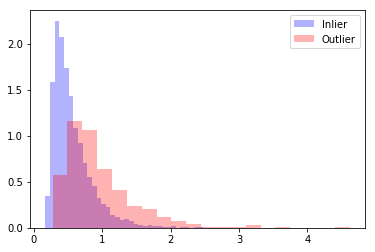

In [12]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()